In [2]:
import pickle
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [13, 10]

## Read in data

In [3]:
csv_file = "../data/BenthamTest/test.csv"
batch_size=16

# read in predictions
data = pickle.load(open("./tf_output/prediction/preds.pkl", "rb"))
labls, accs, losses, cers, preddicts = data
# read in csv
imfiles = pd.read_csv(csv_file, sep="\t")
# imfiles.new_img_path = [l.replace("Images_mod", "Images/Lines") for l in imfiles.new_img_path]

In [4]:
def getImg(ind):
    return Image.open(imfiles.new_img_path.iloc[ind])

def getLab1(ind):
    return imfiles.transcription.iloc[ind]
    
def getLab2(batch, b_ind):
    l1 = labls[batch]
    if len(l1) > 0:
        return l1[b_ind]
    else:
        return ""

def getPred(batch, b_ind):
    p1 = preddicts[batch]["words"]
    if len(p1) > 0:
        return p1[b_ind]
    else:
        return ""

def getIt(batch, b_ind):
    ind = batch*batch_size+b_ind
#     batch = ind // train_batch_size
#     b_ind = ind % train_batch_size
    
    img = getImg(ind)
    tran = getLab1(ind)
    lab = getLab2(batch, b_ind)
    pred = getPred(batch, b_ind)
    
    if lab == "" and pred == "" and tran != "":
        print("No prediction from machine")
        return "", "", ""
    else:
        return img, lab, pred
    
def showIt(batch, b_ind):
    img, lab, pred = getIt(batch, b_ind)
    print("Label:\t\t{0}\nPrediction:\t{1}".format(str(lab, "utf-8"), str(pred, "utf-8")))
    imshow(np.asarray(img), cmap="gray")

# Examples of transcriptions

In [21]:
i = 14
for j in range(16):
    print("Label:\t{0}\nPred:\t{1}\n".format(labls[i][j], preddicts[i]["words"][j]))

Label:	b'Liberty ,  ( B ) '
Pred:	b'Liberty. ] 1 '

Label:	b'In such case , the offender may be either banished quasi-imp='
Pred:	b'Jnsuchicase , the offender mpy be cither banished quasisim .'

Label:	b' : risoned , imprisoned or confined to hard labour for'
Pred:	b' : prisoned , imprisoned or confined to hard labour for'

Label:	b'any length of time or even for Life .'
Pred:	b'any length of time ofeven for Life .'

Label:	b'Exposition .'
Pred:	b'Expofition .'

Label:	b' [  ( B )  Liberty ]  A person who has been kidnapped is not to'
Pred:	b'L Leberty] I person wfo has been kidnapped is notto-'

Label:	b'be understood to have regained his Liberty , till he has'
Pred:	b'be understood to have regpined hiv Liberty , till he has'

Label:	b'been conveyed back to the place from whence he was co : '
Pred:	b'been conveyed back to thel place from whence he was con='

Label:	b' : nveyed against his will , if that be the place at which'
Pred:	b' : veyed against his will , if that be the place at

Label:		In such case , the offender may be either banished quasi-imp=
Prediction:	Jnsuchicase , the offender mpy be cither banished quasisim .


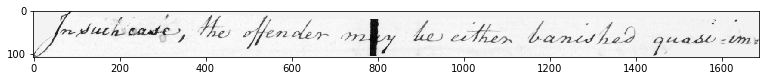

In [22]:
showIt(14, 1)

# Successes

Label:		Rashness consists in the supposing a circumstance
Prediction:	Rashness consists in the supposing a circumstance


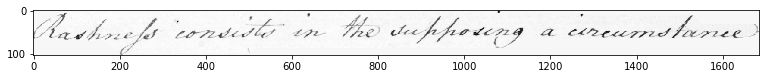

In [19]:
showIt(2, 0)

Label:		the matter of fact where you suppose some damage to 
Prediction:	the matter of fact where you sup pose some damage to 


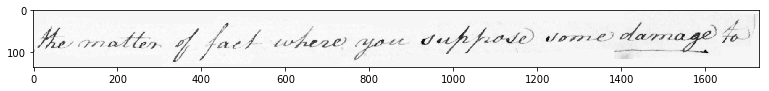

In [7]:
showIt(3, 11)

Label:		whom he may have injured in like manner to come in and
Prediction:	whom he may have injured in like manner to come in and


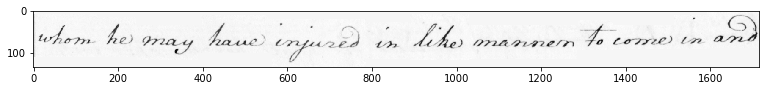

In [12]:
showIt(9, 4)

# Slightly off

Label:		income in driblets day by day during the course of the same 
Prediction:	iintome in obrcblets day by day during the comrse of the csme 


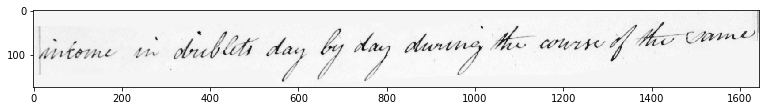

In [7]:
showIt(0,2)

Label:		amounts there will be twice as much to dispose of in any such 
Prediction:	 amounts thore will be twice as much to dispose of in amy ouch 


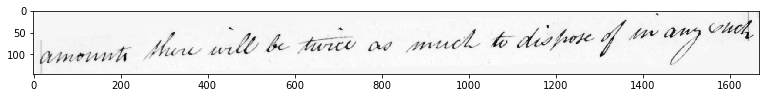

In [8]:
showIt(0,3)

Label:		 : spect actual past or present existence of the facts or circum=
Prediction:	 : spect actual foast or fresent existence of the facts or circum=


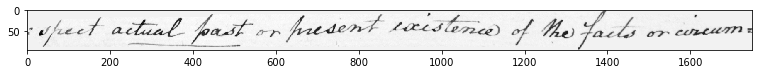

In [7]:
showIt(3, 3)

# Failures

Label:		no evidence is receivable, that was not exhibited 
Prediction:	e aaais , ccewalle , Satwas uatexlitited 


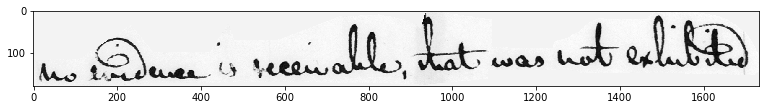

In [10]:
showIt(0,6)

Label:		Of Injuries affecting loco-motion
Prediction:	EDDEy gfagnerdpsmtono


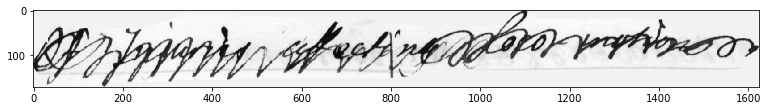

In [15]:
showIt(11, 10)

Label:		Of Kidnapping Confinement .
Prediction:	Of losptsg Confinement


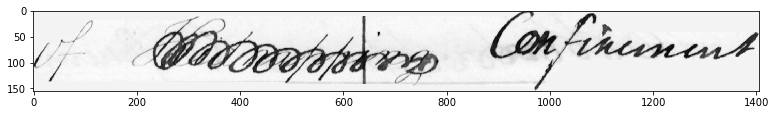

In [16]:
showIt(11, 11)

Label:		In such case , the offender may be either banished quasi-imp=
Prediction:	Jnsuchicase , the offender mpy be cither banished quasisim .


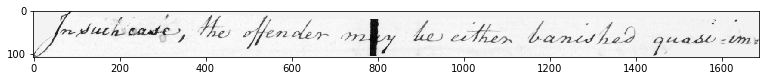

In [22]:
showIt(14, 1)